In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 

df=pd.read_csv('Global_Mobility_Report.csv')
df=df.loc[df.country_region_code=='US']
df=df[df.sub_region_1=='Washington']
df=df[df.sub_region_2=='King County']
df

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
7457151,US,United States,Washington,King County,NaN,NaN,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-02-15,-1.0,-2.0,11.0,8.0,-3.0,0.0
7457152,US,United States,Washington,King County,NaN,NaN,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-02-16,13.0,1.0,19.0,3.0,-2.0,-1.0
7457153,US,United States,Washington,King County,NaN,NaN,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-02-17,10.0,4.0,64.0,-13.0,-40.0,7.0
7457154,US,United States,Washington,King County,NaN,NaN,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-02-18,4.0,2.0,51.0,6.0,-8.0,1.0
7457155,US,United States,Washington,King County,NaN,NaN,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-02-19,2.0,2.0,62.0,6.0,-7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7457782,US,United States,Washington,King County,NaN,NaN,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2021-11-07,-11.0,-14.0,-24.0,-23.0,-11.0,5.0
7457783,US,United States,Washington,King County,NaN,NaN,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2021-11-08,-19.0,-9.0,2.0,-40.0,-43.0,13.0
7457784,US,United States,Washington,King County,NaN,NaN,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2021-11-09,-20.0,-11.0,-11.0,-43.0,-43.0,14.0
7457785,US,United States,Washington,King County,NaN,NaN,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2021-11-10,-16.0,-7.0,16.0,-40.0,-43.0,12.0


In [3]:
# import package
from kats.consts import TimeSeriesData

df = df.rename(columns={"date": "time", "retail_and_recreation_percent_change_from_baseline": "value"})
df = df[["time", "value"]]
ts_bocpd = TimeSeriesData(df)
ts_bocpd

,time,value
0,2020-02-15,-1.0
1,2020-02-16,13.0
2,2020-02-17,10.0
3,2020-02-18,4.0
4,2020-02-19,2.0
...,...,...
631,2021-11-07,-11.0
632,2021-11-08,-19.0
633,2021-11-09,-20.0
634,2021-11-10,-16.0


In [4]:
from kats.detectors.bocpd import BOCPDetector, BOCPDModelType, TrendChangeParameters

# Initialize the detector
detector = BOCPDetector(ts_bocpd)


changepoints = detector.detector(
    model=BOCPDModelType.NORMAL_KNOWN_MODEL, threshold=0.8 # this is the default choice
)

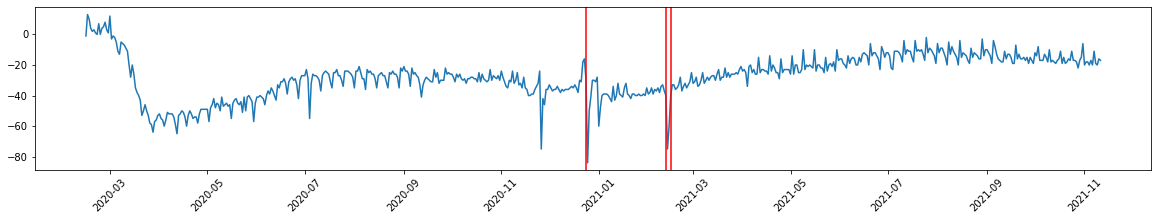

In [5]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,3)
plt.xticks(rotation=45)
detector.plot(changepoints)
plt.show()